In [1]:
import pathlib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import re

In [23]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
RGB_IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

BATCH_SIZE = 32

In [24]:
TRAIN_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_train_split/whole_resize'
TEST_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_eval_img_resize/'

In [5]:
import tensorflow as tf

In [6]:
keras = tf.keras

### Data analysis tasks

- Create a dataframe of image_name to labels input file (labels_map_df)
- Import the features file as a list (features_list)
- Filter the dataframe columns to retain all the columns matching in features_file and discard the rest. Copy the resulting dataframe to a new dataframe (updated_labels_df)
    - Make sure to add the columns ['#Attr 266', 'Name', 'Price']
    
Create the following plots

- 

In [25]:
labels  = pd.read_csv('dataset/jc_input.txt')

/home/ilambda/.conda/envs/tf20/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
labels.head()

,#Attr 266,Name,Price,Elasticity|High Elasticity,Elasticity|Mid-Elastic,Elasticity|Nonelastic,Fitness|Skinny,Fitness|Loose,Fitness|Slim,Fitness|Plus Size,...,Placket|Single Breasted,Placket|Zipper,Placket|Open Front,Placket|Double Breasted,Placket|Multi Buttons,Placket|Lacing,Placket|Single Button,Placket|Covered Button,Placket|Three Buttons,Placket|Horn Button
0,5819614,Casual hooded collar solid color hollow pullov...,141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5819060,E• ECKY Women's Shirts Chiffon Long Loose Flor...,70.90,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5818650,Qiuyeding Shop Summer new short-sleeved retro ...,14.99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5818604,Qiuyeding Shop Super slim V-neck slim wild sho...,28.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5818600,Maternity ress V Neck Short Sleeve Loose Lace...,39.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
labels.shape

(339837, 269)

In [28]:
features = np.loadtxt('dataset/selected_feature.txt', dtype=str, delimiter='\n')

In [29]:
len(features)

229

### Change the column names in dataset. Repelace pipe with space. 
This is done to match the column names specified in  the selected_features.txt

In [30]:
columns_with_pipe = list(filter(lambda x: re.match('.*\|.*',x), labels.columns))

In [31]:
len(columns_with_pipe)

266

In [32]:
columns_replaced_pipe = set(map(lambda x: x.replace('|', ' '), labels.columns))

In [33]:
len((columns_replaced_pipe).intersection(set(features)))

229

### List of columns containing the labels

In [34]:
desired_columns = list((columns_replaced_pipe).intersection(set(features)))

In [35]:
NUM_CATEGORIES = len(desired_columns)

In [36]:
all_columns = ["#Attr 266", "Name", "Price"] + desired_columns 

In [37]:
updated_labels_df = labels.copy()

### Stores the mapping of renamed_cols to original_cols

In [38]:
renamed_to_orig_cols_dict = dict([ (col, col.replace('|', ' ')) for col in updated_labels_df.columns])

In [39]:
updated_labels_df.rename(renamed_to_orig_cols_dict, axis=1, inplace=True)

In [40]:
updated_labels_df = updated_labels_df[all_columns]

In [41]:
updated_labels_df.shape

(339837, 232)

### Update the column name "#Attr 266" to filename

In [42]:
updated_labels_df.rename({'#Attr 266': "filename"}, axis=1, inplace=True)

In [43]:
updated_labels_df["filename"] = updated_labels_df["filename"].apply(lambda x: str(x)+".jpg")

### Remove duplicates

In [47]:
# Identify duplicate files
updated_labels_df.filename.value_counts()

&  ress.jpg    4
5197960.jpg    1
6016855.jpg    1
3885350.jpg    1
662184.jpg     1
              ..
4784376.jpg    1
7408283.jpg    1
7636807.jpg    1
7882193.jpg    1
2596362.jpg    1
Name: filename, Length: 339834, dtype: int64

In [48]:
# 4 files with name '&  ress.jpg' are duplicated
to_remove_index = updated_labels_df[(updated_labels_df.filename == '&  ress.jpg')].index

In [49]:
updated_labels_df.drop(to_remove_index, inplace=True)

### Remove nans

In [50]:
rows_with_nan = updated_labels_df[updated_labels_df[desired_columns].isna().sum(axis=1) > 0].index

In [51]:
print(f"Number of rows with NaN: {len(rows_with_nan)}")

Number of rows with NaN: 18


In [52]:
updated_labels_df.drop(rows_with_nan, inplace=True)

In [53]:
updated_labels_df.shape

(339815, 232)

In [54]:
# Check for further nans
sum(updated_labels_df[desired_columns].isna().sum()>0)

0

### Update the Nan name attribute with blank_string

In [55]:
updated_labels_df.Name.fillna("",inplace=True)

### Save the processed dataframe to disk.

In [57]:
updated_labels_df.to_csv('attribute_detection_df.csv', index_label='index')

### Read the processed df from disk

In [58]:
updated_labels_df = pd.read_csv('attribute_detection_df.csv', index_col='index')

In [60]:
updated_labels_df.shape

(339815, 232)

### Train test split
- update index to dataframe to file name
- perform a set intersection of df index and training_fname from the training images directory
- perform a set intersection of df index and testing_fname from the testing images directory
- create separate dfs - training_df and testing_df

In [44]:
# Set the index as filename. Useful in mapping the filename from the directory
updated_labels_df.set_index(updated_labels_df.filename, inplace=True)

### Load the filenames from disk

In [44]:
import pathlib
import glob
import os

In [45]:
training_list = [f.name for f in pathlib.Path(TRAIN_IMAGE_PATH).glob('*.jpg')]
testing_list = [f.name for f in pathlib.Path(TEST_IMAGE_PATH).glob('*.jpg')]

In [46]:
training_fname = list(set(updated_labels_df.filename.values).intersection(set(training_list)))
testing_fname = list(set(updated_labels_df.filename.values).intersection(set(testing_list)))
print(f"Number of training files with attributes: {len(training_fname)}")
print(f"Number of testing files with attributes: {len(testing_fname)}")

Number of training files with attributes: 96202
Number of testing files with attributes: 11453


In [51]:
train_index = set(updated_labels_df.index).intersection(set(training_fname))

In [52]:
test_index = set(updated_labels_df.index).intersection(set(testing_fname))

### Training and testing df

In [53]:
training_df = updated_labels_df.loc[list(train_index)]
testing_df = updated_labels_df.loc[list(test_index)]

### Save the dataframes by split into train and test

In [62]:
training_df.to_csv('attributes_training_df.csv', index_label='index')
testing_df.to_csv('attributes_testing_df.csv', index_label='index')

### Import the saved data_frames

In [2]:
training_df = pd.read_csv('attributes_training_df.csv', index_col='index')
testing_df = pd.read_csv('attributes_testing_df.csv', index_col='index')

In [3]:
print(training_df.shape)
print(testing_df.shape)

(96197, 232)
(11453, 232)


In [5]:
desired_columns = set(training_df.columns).difference(set(["filename", "Name", "Price"]))

### Create generators
- class_type = 'other' is very important
- shuffle = False to address the memory issue while training. Shuffle consumes a large amount of RAM

In [29]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
testdatagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [30]:
# for other - each label would be 229 dimensions
training_gen = datagen.flow_from_dataframe(training_df, 
                           directory=TRAIN_IMAGE_PATH,
                           x_col='filename',
                           y_col=desired_columns,
                           class_mode='other',
                           target_size=IMAGE_SIZE,
                           subset='training', 
                           shuffle=False)

Found 67338 validated image filenames.


In [31]:
validation_gen = datagen.flow_from_dataframe(training_df, 
                           directory=TRAIN_IMAGE_PATH,
                           x_col='filename',
                           y_col=desired_columns,
                           class_mode='other',
                           target_size=IMAGE_SIZE,
                           subset='validation', 
                           shuffle=False)

Found 28859 validated image filenames.


In [32]:
test_gen = testdatagen.flow_from_dataframe(testing_df, 
                           directory=TEST_IMAGE_PATH,
                           x_col='filename',
                           y_col=desired_columns,
                           class_mode='other',
                           target_size=IMAGE_SIZE, 
                           shuffle=False)

Found 11453 validated image filenames.


In [55]:
base_model = keras.applications.resnet.ResNet50(include_top=False, 
                                                weights='imagenet',
                                                input_shape=RGB_IMAGE_SIZE,
                                                pooling='avg')

### Custom model creation
- Sequential() model
- Activation at prediction layer = sigmoid, NUM_CATEGORIES = 229
    - sigmoid will return a score in (0,1) for each feature
    - in total 229 features will be returned in form of a vector
- Loss function is binary_crossentropy (with_logits = False) 
    - loss function calculates the loss by comparing the predicted_loss by sigmoid and the actual label (0 or 1) of the feature
    - The input to the optimizer = the output from the dense layer is already normalized by sigmoid. Hence, we need to configure (with_logits=False) in the optimizer to avoid applying sigmoid twice

In [56]:
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(NUM_CATEGORIES, activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 229)               469221    
Total params: 24,056,933
Trainable params: 24,003,813
Non-trainable params: 53,120
_________________________________________________________________


In [58]:
history = model.fit(training_gen, validation_data=validation_gen, verbose=1, epochs=3)

Train for 2105 steps, validate for 902 steps
Epoch 1/3
2105/2105 [==============================] - 753s 358ms/step - loss: 0.0966 - accuracy: 0.9641 - val_loss: 0.0928 - val_accuracy: 0.9652
Epoch 2/3
2105/2105 [==============================] - 743s 353ms/step - loss: 0.0856 - accuracy: 0.9673 - val_loss: 0.0989 - val_accuracy: 0.9632
Epoch 3/3
2105/2105 [==============================] - 743s 353ms/step - loss: 0.0808 - accuracy: 0.9687 - val_loss: 0.0963 - val_accuracy: 0.9642


In [59]:
print(history.history)

{'loss': [0.09662438451229416, 0.08563939180688623, 0.08080639689364111], 'accuracy': [0.96412295, 0.9672664, 0.9687397], 'val_loss': [0.09279968203799159, 0.09893866335176046, 0.09630925411527808], 'val_accuracy': [0.9651805, 0.9632263, 0.9642269]}


In [60]:
model.save("attribute_detection_1.h5")

In [170]:
np.count_nonzero(adds[1])

326

### Model Evaluation

- load the new model
- load the history file from the disk

In [45]:
def convert_to_cat(res):
    out = []
    for i, a in enumerate(res):
        if a >= 0.5:
            out.append(1)
        else:
            out.append(0)
    return out

def convert_arr_to_cat(arr):
    rows,cols = arr.shape
    for i in range(rows):
        for j in range(cols):
            if arr[i][j] >= 0.5:
                arr[i][j] = 1
            else:
                arr[i][j] = 0
    return arr

### Load old model

In [66]:
model = keras.models.load_model('attribute_detection_1.h5')

In [67]:
results = model.evaluate(test_gen)

358/358 [==============================] - 50s 139ms/step - loss: 0.4745 - accuracy: 0.9162


In [68]:
test_gen.reset()
res = model.predict(test_gen)

In [72]:
preds = convert_arr_to_cat(res)

In [123]:
print(f"Shape of actuals: {actuals.shape}\nShape of preds: {preds.shape}")

Shape of actuals: (11453, 229)
Shape of preds: (11453, 229)


### Load new model

In [33]:
new_model = keras.models.load_model('attribute_detection_model_2020_02_20_13_18_46.h5')

In [155]:
import json

### Plot Accuracy and loss

In [166]:
f = open('attribute_detection_history_2020_02_20_13_18_46.json').read()
new_history = eval(json.loads(f))

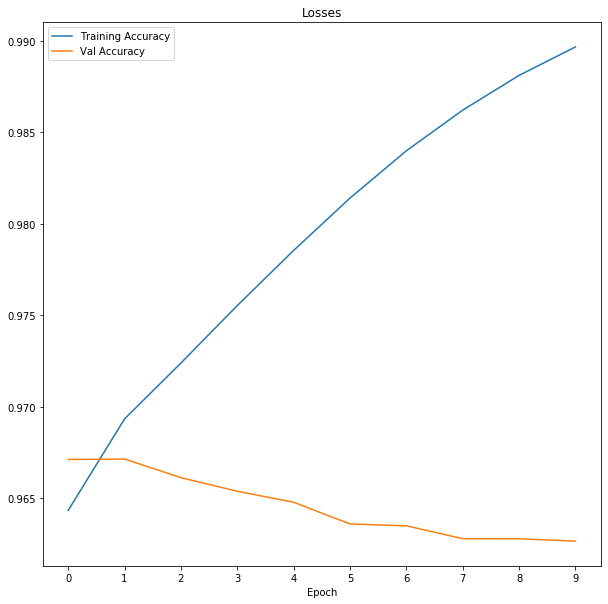

In [172]:
plt.figure(figsize=(10,10))
plt.title("Losses")
plt.plot(new_history['accuracy'], label="Training Accuracy")
plt.plot(new_history['val_accuracy'], label = "Val Accuracy")
plt.xlabel('Epoch')
plt.xticks([i for i in range(len(new_history.get('loss')))])
plt.legend()
plt.show()

In [39]:
test_gen.reset()
new_results = new_model.predict(test_gen)

In [43]:
new_actuals = test_gen.labels

In [46]:
new_preds = convert_arr_to_cat(new_results)

In [74]:
roc_curve(new_actuals[:,0], new_results[:,0], drop_intermediate=False)

(array([0.        , 0.06381828, 1.        ]),
 array([0.        , 0.04456825, 1.        ]),
 array([2., 1., 0.], dtype=float32))

In [73]:
np.count_nonzero(new_results[:,0])

724

In [60]:
from sklearn.metrics import auc,ro

In [146]:

import random
import numpy as np
import matplotlib.pyplot as plt


def categorize_actual_preds(actuals, preds, threshold=0.5):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    #print(actuals.shape)
    if actuals.size != preds.size:
        print("Shapes of actuals and preds not equal")
        return tp, tn, fp, fn
    if np.count_nonzero(actuals) == 0:
        #print("[WARNING] No positive predictions")
        return tp, tn, fp, fn
    
    if actuals.ndim == 2:
        actuals = np.squeeze(actuals, axis=0)
        preds = np.squeeze(preds, axis=0)

    true_indices = []
    false_indices = []
    for i, val in enumerate(actuals):
        if val:
            true_indices.append(i)
        else:
            false_indices.append(i)

    # Calculate tp and fn
    for i in true_indices:
        act = actuals[i]
        pred = preds[i]
        if pred >= threshold:
            tp += 1
        else:
            fn += 1

    # Calculate tn and fp
    for i in false_indices:
        pred = preds[i]
        if pred >= threshold:
            fp += 1
        else:
            tn += 1

    return tp, tn, fp, fn


def calculate_roc(tp, tn, fp, fn):

    tpr = 0.0
    fpr = 0.0
    try:
        tpr = (tp) / (tp + fn)
        fpr = (fp) / (fp + tn)

    except Exception:
        #print("Some error occurred!")
        pass
    return tpr, fpr


def roc_curve1(actuals, preds, thresholds):
    tprs = []
    fprs = []
    for t in thresholds:
        tp, tn, fp, fn = categorize_actual_preds(actuals, preds, t)
        tpr, fpr = calculate_roc(tp, tn, fp, fn)
        tprs.append(tpr)
        fprs.append(fpr)

    tprs = np.expand_dims(np.array(tprs), axis=0)
    fprs = np.expand_dims(np.array(fprs), axis=0)

    return tprs, fprs, thresholds



def plot_roc(tpr, fpr, threshold=0.5):
    if isinstance(tpr, list):
        tpr = np.array(tpr)
        tpr = np.expand_dims(tpr, axis=0)
    if isinstance(fpr, list):
        fpr = np.array(fpr)
        fpr = np.expand_dims(fpr, axis=0)

    plt.figure(figsize=(12, 12))

    for i in range(tpr.shape[0]):
        plt.plot(fpr[i, :], tpr[i, :], marker='o', label=str(i))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

In [92]:
aa = {}
for i in range(new_actuals.shape[1]):
    aa[i] = np.count_nonzero(new_actuals[:,i])

In [ ]:
thresholds = [i/100 for i in range(101)]
tprs = []
fprs = []

for col in range(20):
    t1,p1, _ = roc_curve1(np.expand_dims(new_actuals[:,col],axis=0), np.expand_dims(new_results[:,col],axis=0),thresholds=thresholds)
    #tpr, fpr = calculate_roc(tp, tn, fp, fn)
    tprs.append(t1)
    fprs.append(p1)
tprs = np.concatenate(tprs, axis=0)
fprs = np.concatenate(fprs, axis=0)
plot_roc(tprs, fprs)

### Check Sparsity

In [130]:
features_np = training_df[desired_columns].to_numpy()

In [132]:
sparsity = 1 - np.count_nonzero(features_np)/features_np.size
print(f"")

0.9526987763874106

In [140]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(actuals, preds):
    plt.figure(figsize=(12,12))
    for i in range(preds.shape[1]):
        fpr, tpr, thres = roc_curve(actuals[:,i], preds[:,i], drop_intermediate=False)
        plt.plot(fpr, tpr, label=str(i), marker='o')
    plt.plot([0, 1], ls="--", label="Threshold")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [141]:
plot_roc_curve(actuals, preds)

NameError: name 'preds' is not defined

In [135]:
from sklearn.metrics import classification_report

In [139]:
def generate_classification_report(actuals, preds):
    all_class_report = {}
    if actuals.size == preds.size:
        for i in range(actuals.shape[1]):
            class_name = desired_columns[i]
            all_class_report[class_name] = classification_report(actuals[i,:], preds[i,:], output_dict=True)
    else:
        print("The sizes of actuals and preds are different")
    return all_class_report

In [140]:
new_classification_report = generate_classification_report(actuals, new_preds)

In [143]:
feats = sorted(new_classification_report.keys())

In [145]:
recall_1s = [new_classification_report[k]['1.0']['recall']for k in feats]
precision_1s = [new_classification_report[k]['1.0']['precision']for k in feats]
f1_1s = [new_classification_report[k]['1.0']['f1-score']for k in feats]

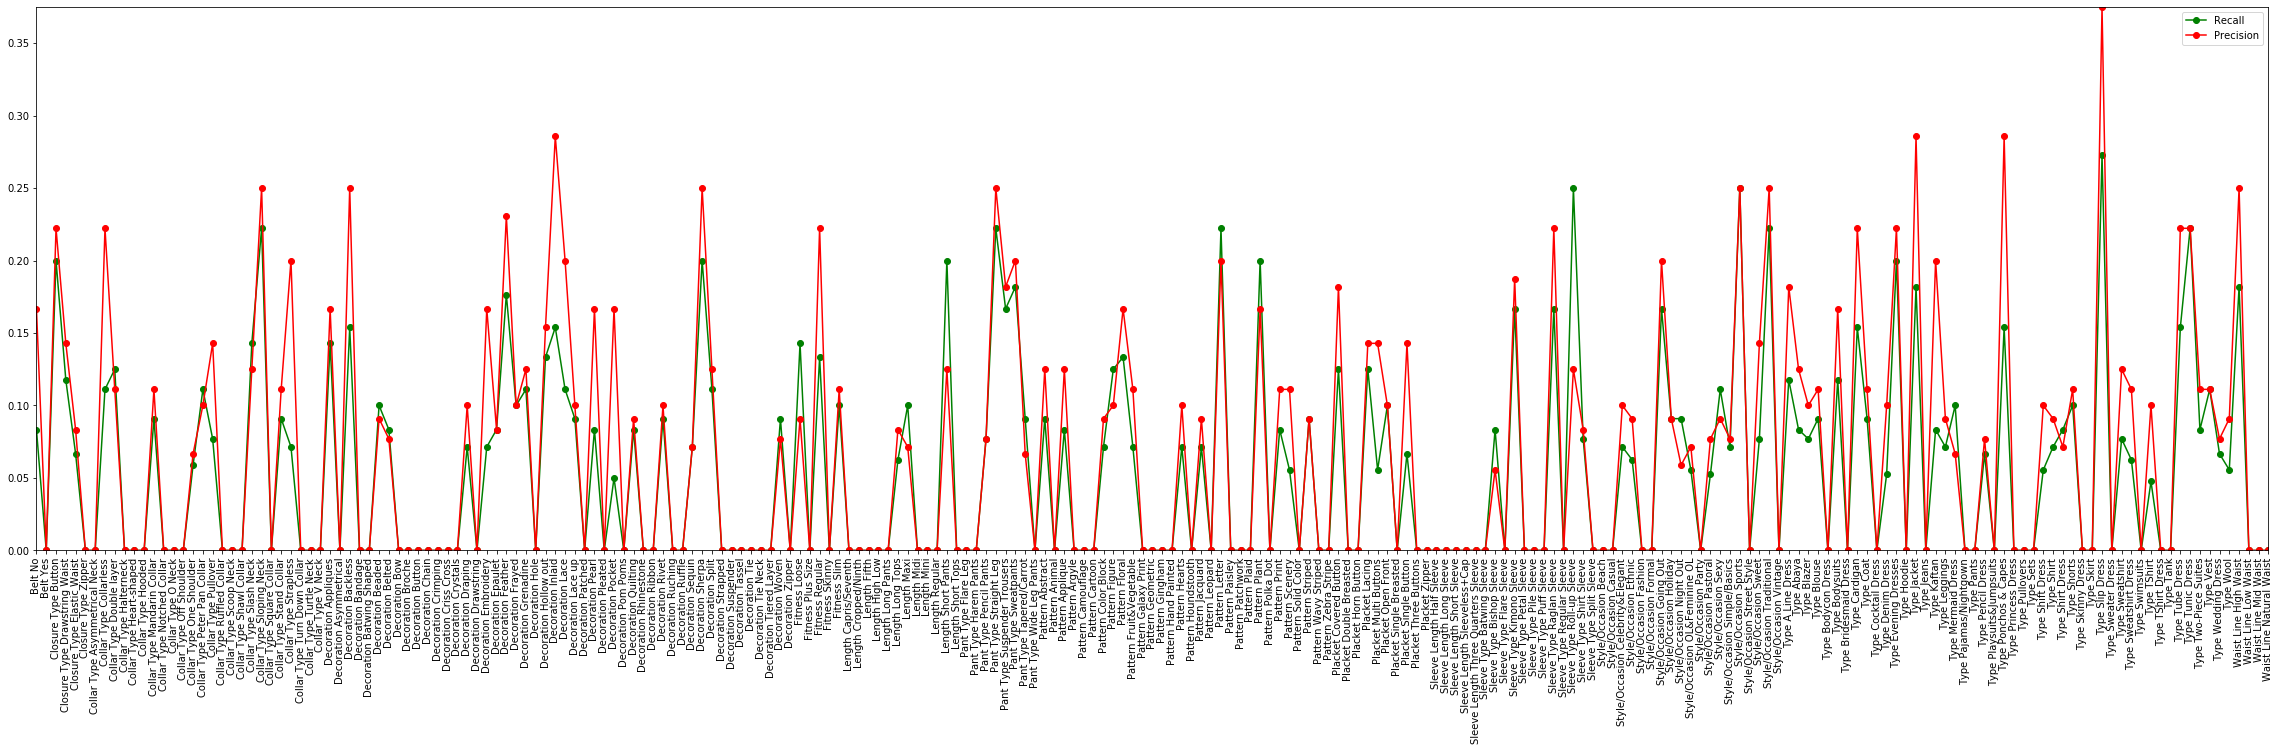

In [154]:
plt.figure(figsize=(40,10))
plt.autoscale(tight=True)
plt.plot(feats, recall_1s, marker='o', color="green", label="Recall")
plt.plot(feats, precision_1s, marker='o', color="red", label="Precision")
plt.xticks(rotation=90)
plt.legend()
plt.savefig('precision_recall.png', orientation='landscape')
plt.show()

## Feature Analysis

In [7]:
sorted_desired_columns = sorted(desired_columns)
copied_training_df = training_df.copy()

In [8]:
features_df = copied_training_df[sorted_desired_columns].apply(np.mean, axis=0).T

In [15]:
features_df[features_df > 0.01].index

Index(['Belt No', 'Belt Yes', 'Closure Type Elastic Waist',
       'Collar Type Halterneck', 'Collar Type Hooded',
       'Collar Type Notched Collar', 'Collar Type O Neck',
       'Collar Type Off Shoulder', 'Collar Type Slash Neck',
       'Collar Type Square Collar',
       ...
       'Type Skinny Dress', 'Type Skirt', 'Type Slip Dress', 'Type Sweatshirt',
       'Type TShirt', 'Type TShirt Dress', 'Type Tank',
       'Type Two-Piece Suites', 'Waist Line High Waist',
       'Waist Line Mid Waist'],
      dtype='object', length=112)

In [177]:
features_df.reset_index(inplace=True)

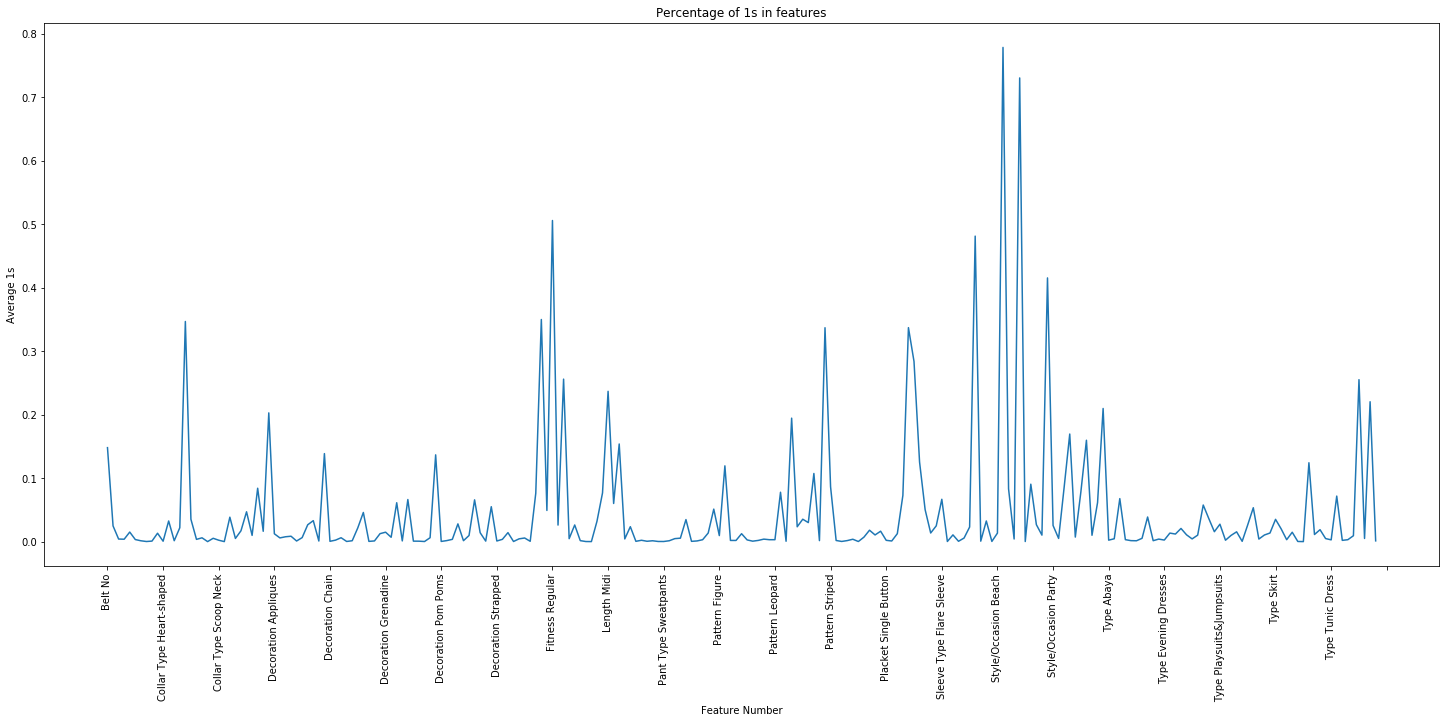

In [67]:
plt.figure(figsize=(25,10))
plt.plot(features_df['mean'])
plt.xticks([i*10 for i in range(24)],rotation=90)
plt.title("Percentage of 1s in features")
plt.xlabel("Feature Number")
plt.ylabel("Average 1s")
plt.show()

In [178]:
features_df

,index,mean,sum,len
0,Belt No,0.148019,14239.0,96197.0
1,Belt Yes,0.024751,2381.0,96197.0
2,Closure Type Button,0.004065,391.0,96197.0
3,Closure Type Drawstring Waist,0.003763,362.0,96197.0
4,Closure Type Elastic Waist,0.015042,1447.0,96197.0
...,...,...,...,...
224,Type Wool,0.009273,892.0,96197.0
225,Waist Line High Waist,0.255112,24541.0,96197.0
226,Waist Line Low Waist,0.004969,478.0,96197.0
227,Waist Line Mid Waist,0.220340,21196.0,96197.0


In [68]:
print(f"The total Number of features: {features_df.shape[0]}")

The total Number of features: 229


In [69]:
features_ge_2 = features_df[features_df['mean'] > 0.02]
print(f"Number of features with #ones > 2%: {features_ge_2.shape[0]}")
features_ge_1 = features_df[features_df['mean'] > 0.01]
print(f"Number of features with #ones > 1%: {features_ge_1.shape[0]}")

Number of features with #ones > 2%: 82
Number of features with #ones > 1%: 112


In [72]:
features_df[features_df['mean'] > 0.01].index

Index(['Belt No', 'Belt Yes', 'Closure Type Elastic Waist',
       'Collar Type Halterneck', 'Collar Type Hooded',
       'Collar Type Notched Collar', 'Collar Type O Neck',
       'Collar Type Off Shoulder', 'Collar Type Slash Neck',
       'Collar Type Square Collar',
       ...
       'Type Skinny Dress', 'Type Skirt', 'Type Slip Dress', 'Type Sweatshirt',
       'Type TShirt', 'Type TShirt Dress', 'Type Tank',
       'Type Two-Piece Suites', 'Waist Line High Waist',
       'Waist Line Mid Waist'],
      dtype='object', length=112)

In [223]:
features_df.rename({"index": "feature"}, axis=1, inplace=True)

### Split the features into multiple groups based on the 1st word of the feature

In [226]:
features_df['group']= features_df['feature'].apply(lambda x: x.split(' ')[0])

In [235]:
feature_groups = features_df.groupby('group', axis=0)

In [251]:
# Distinct groups
list(feature_groups.groups.keys())

['Belt',
 'Closure',
 'Collar',
 'Decoration',
 'Fitness',
 'Length',
 'Pant',
 'Pattern',
 'Placket',
 'Sleeve',
 'Style/Occasion',
 'Type',
 'Waist']

In [267]:
xx = features_df.groupby(['group','feature']).sum()

In [277]:
xx['mean'].groupby(level=0, group_keys=False).nlargest(3)


group           feature                      
Belt            Belt No                          0.148019
                Belt Yes                         0.024751
Closure         Closure Type Elastic Waist       0.015042
                Closure Type Button              0.004065
                Closure Type Drawstring Waist    0.003763
Collar          Collar Type O Neck               0.346768
                Collar Type V Neck               0.202792
                Collar Type Turn Down Collar     0.084077
Decoration      Decoration Button                0.138643
                Decoration Pocket                0.136678
                Decoration Zipper                0.076281
Fitness         Fitness Regular                  0.505837
                Fitness Loose                    0.349897
                Fitness Slim                     0.255954
Length          Length Midi                      0.236743
                Length Regular                   0.153778
                Length Max

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52d36348d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52d3611f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52d3634890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52d36019d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52d3601ed0>],
 'means': []}

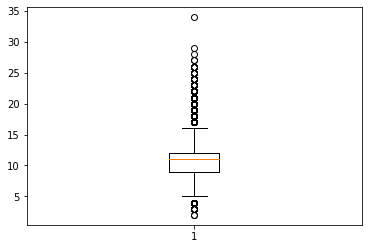

In [283]:
plt.boxplot(training_df[desired_columns].apply(sum, axis=1).values)

In [289]:
features_per_image_df = training_df[desired_columns].apply(sum, axis=1)

In [317]:
per_image_metrics = features_per_image_df.agg({'min':min,'max':max,'avg':np.mean,'median':np.median},axis=0)

In [325]:
 xx = pd.DataFrame(per_image_metrics, columns=['value'])

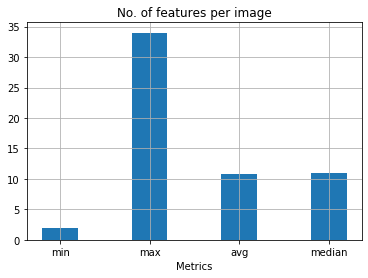

In [351]:
plt.bar(np.arange(len(xx.index)), height=xx.values[:,0], width=0.4)
plt.title("No. of features per image")
plt.xlabel('Metrics')
plt.grid(True)
plt.xticks(np.arange(len(xx.index)), labels= xx.index)
plt.show()

In [304]:
import seaborn as sns

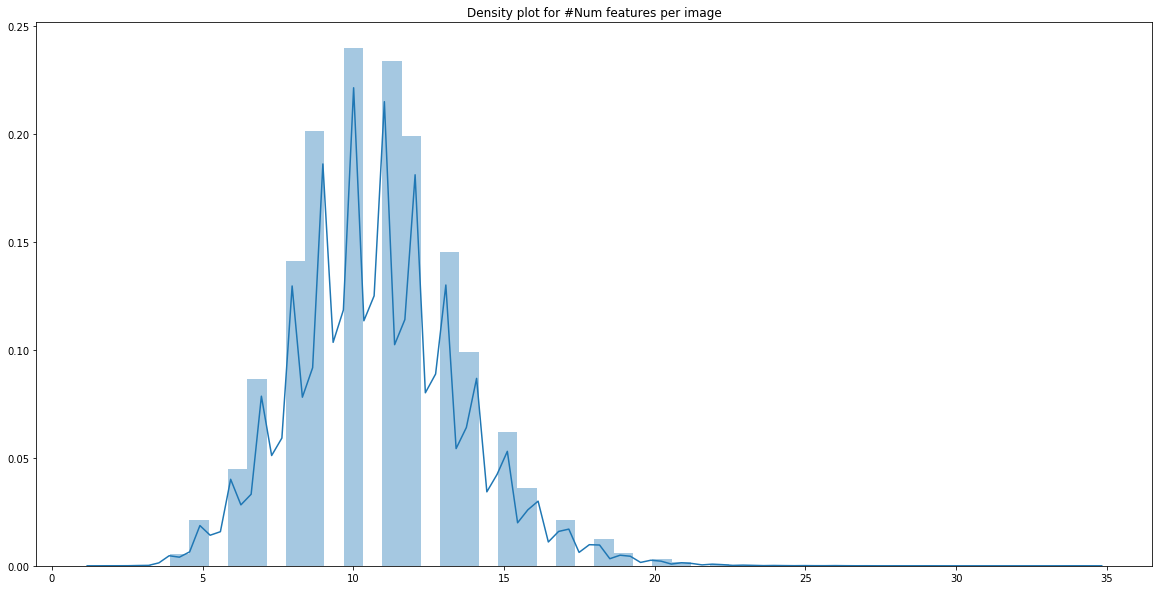

In [309]:
plt.figure(figsize=(20,10))
plt.title("Density plot for #Num features per image")
sns.distplot(features_per_image_df.values)
plt.show()

In [246]:
feature_groups.get_group('Collar').sort_values('sum', ascending=False)

,feature,mean,sum,len
14,Collar Type O Neck,0.346768,33358.0,96197.0
29,Collar Type V Neck,0.202792,19508.0,96197.0
27,Collar Type Turn Down Collar,0.084077,8088.0,96197.0
25,Collar Type Stand Collar,0.046997,4521.0,96197.0
22,Collar Type Slash Neck,0.038484,3702.0,96197.0
15,Collar Type Off Shoulder,0.035209,3387.0,96197.0
11,Collar Type Hooded,0.032496,3126.0,96197.0
13,Collar Type Notched Collar,0.021830,2100.0,96197.0
24,Collar Type Square Collar,0.017090,1644.0,96197.0
28,Collar Type Turtle Neck,0.016279,1566.0,96197.0


In [100]:
avg_ones_features = training_df[sorted(desired_columns)].mean(axis=0)

In [91]:
features_analysis_df = training_df[sorted(desired_columns)].apply([sum, len, np.mean], axis=0).T

In [92]:
features_analysis_df['group'] = features_analysis_df.apply(lambda row: row.name.split(' ')[0], axis=1)

In [93]:
features_analysis_df['feature'] = features_analysis_df.index

In [94]:
features_analysis_df.head()

,sum,len,mean,group,feature
Belt No,14239.0,96197.0,0.148019,Belt,Belt No
Belt Yes,2381.0,96197.0,0.024751,Belt,Belt Yes
Closure Type Button,391.0,96197.0,0.004065,Closure,Closure Type Button
Closure Type Drawstring Waist,362.0,96197.0,0.003763,Closure,Closure Type Drawstring Waist
Closure Type Elastic Waist,1447.0,96197.0,0.015042,Closure,Closure Type Elastic Waist


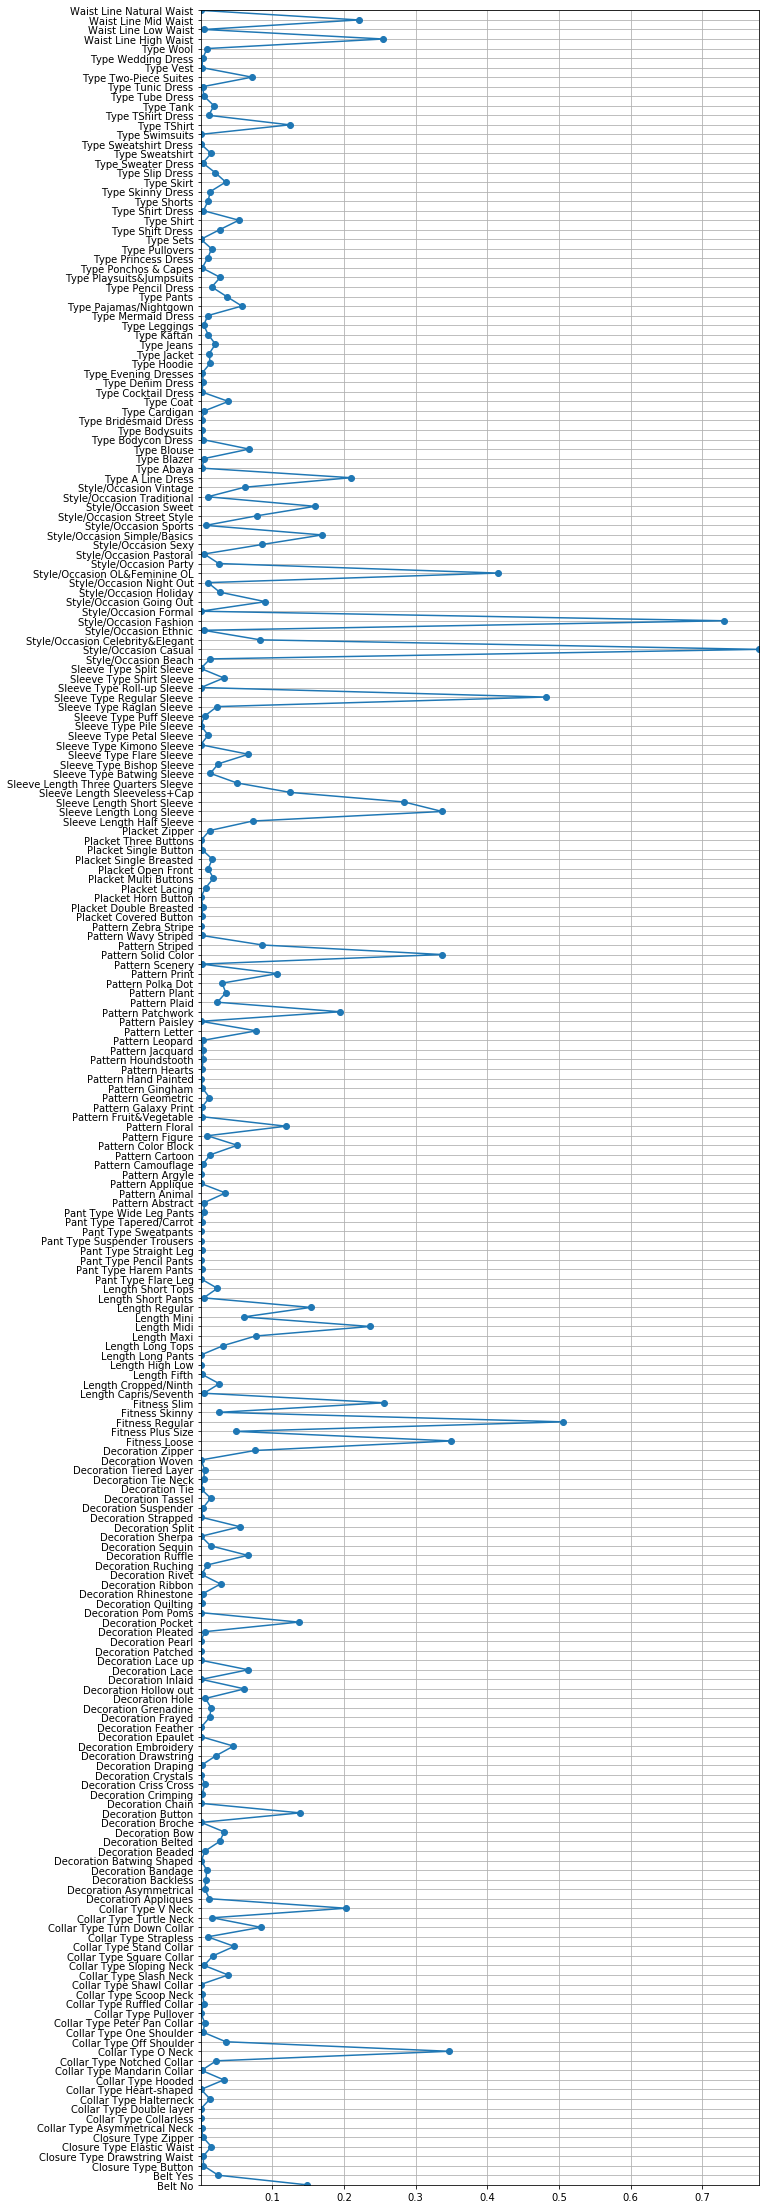

In [113]:
plt.figure(figsize=(10,40))
plt.plot(avg_ones_features.values ,avg_ones_features.index, marker='o')
plt.grid()
plt.autoscale(tight=True)
plt.savefig("bb.png")
plt.show()


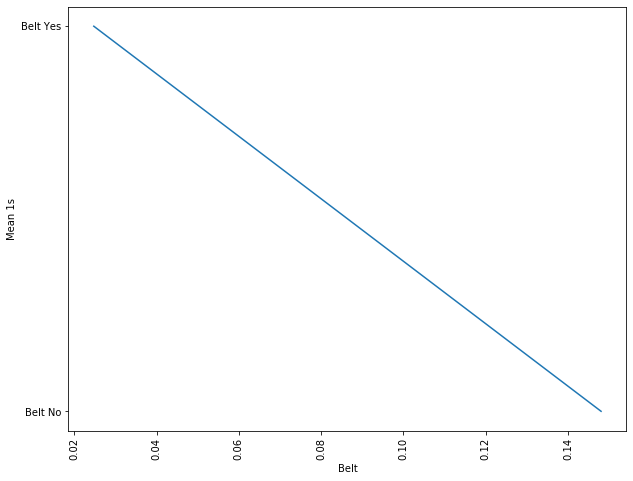

<Figure size 432x288 with 0 Axes>

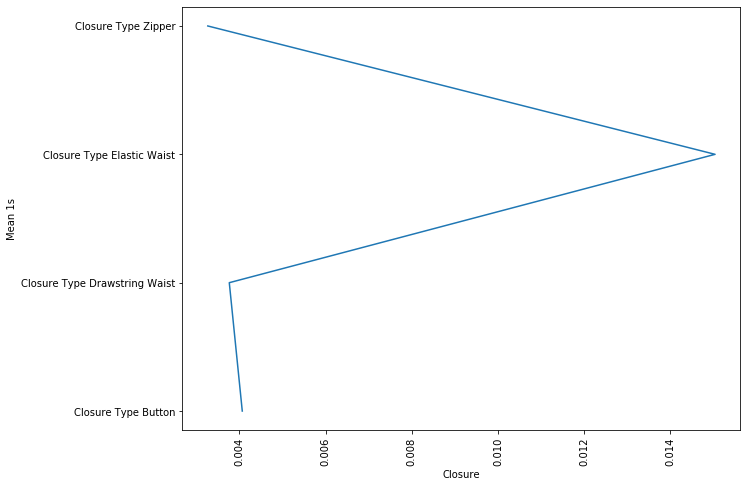

<Figure size 432x288 with 0 Axes>

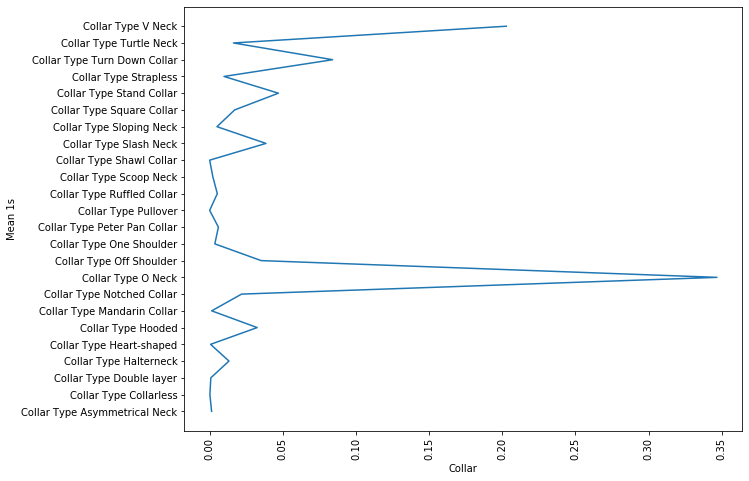

<Figure size 432x288 with 0 Axes>

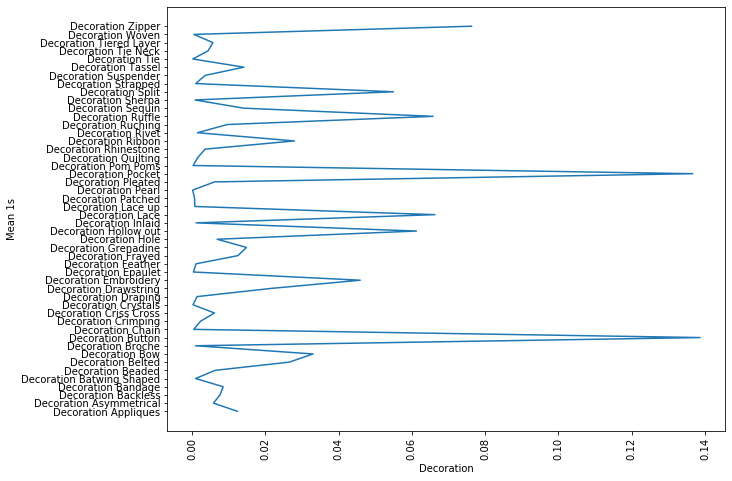

<Figure size 432x288 with 0 Axes>

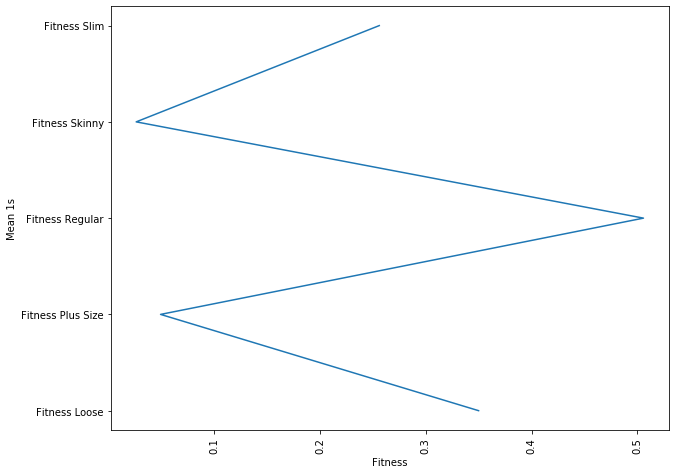

<Figure size 432x288 with 0 Axes>

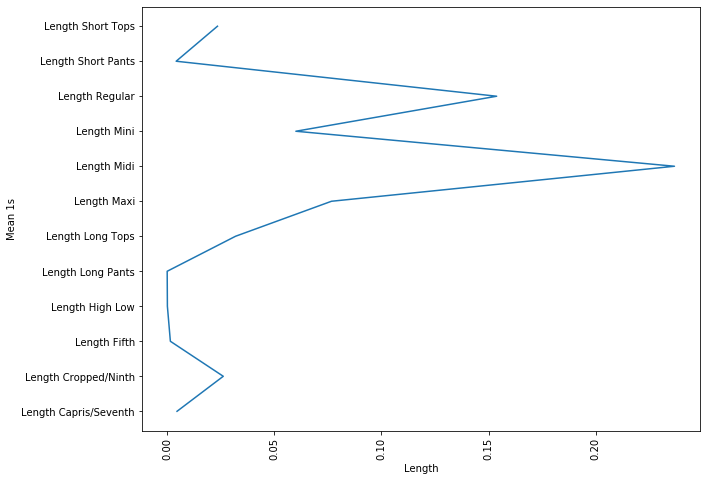

<Figure size 432x288 with 0 Axes>

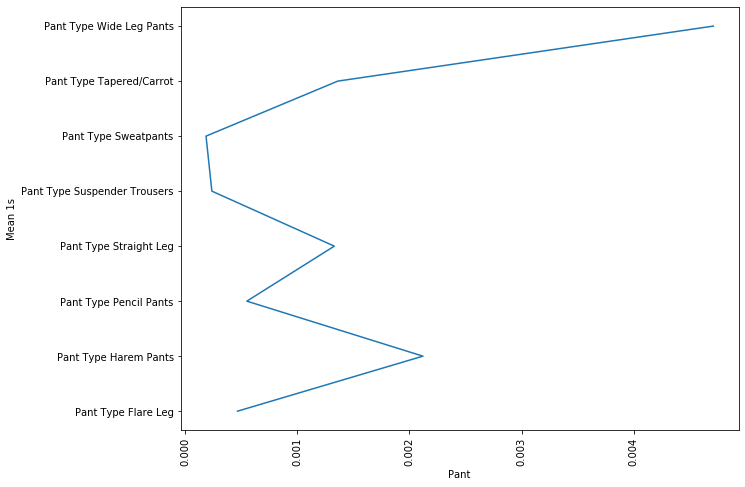

<Figure size 432x288 with 0 Axes>

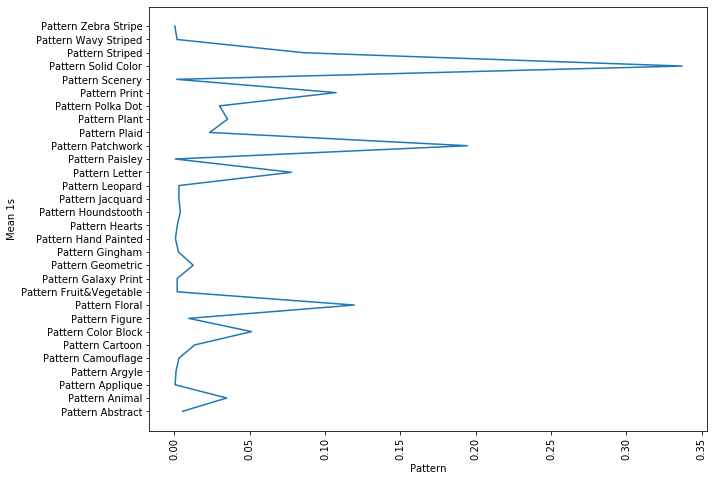

<Figure size 432x288 with 0 Axes>

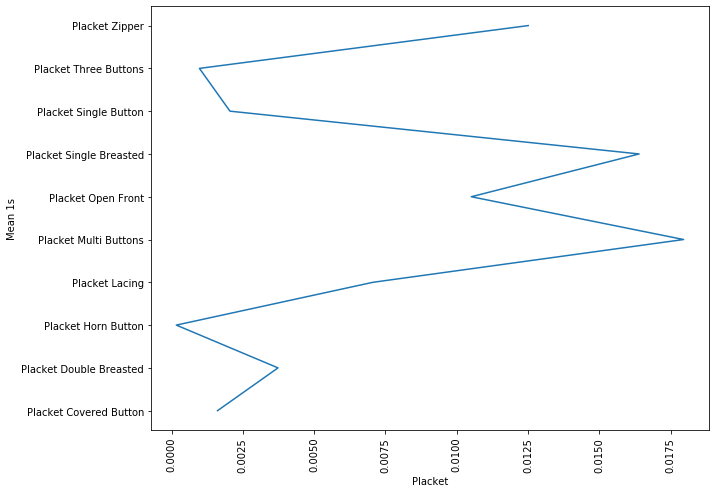

<Figure size 432x288 with 0 Axes>

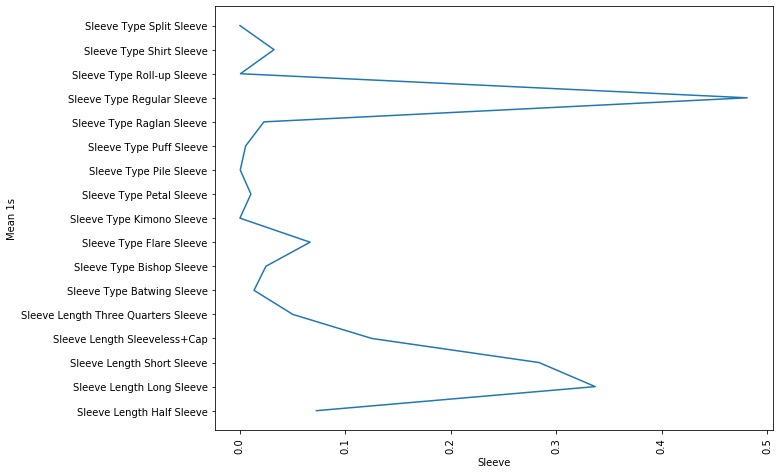

<Figure size 432x288 with 0 Axes>

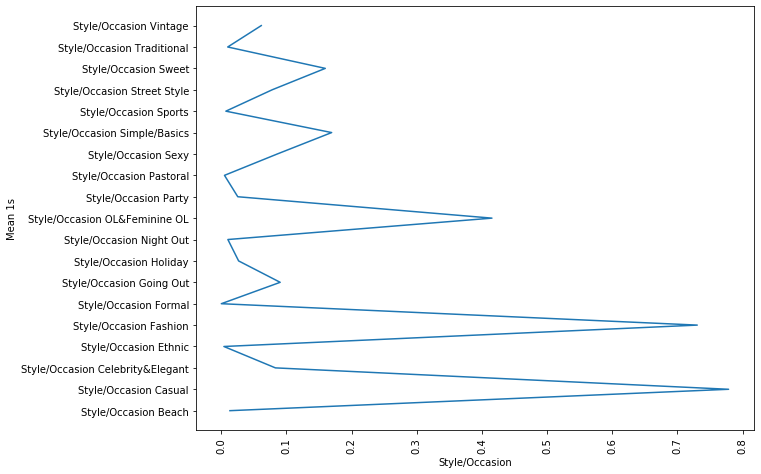

<Figure size 432x288 with 0 Axes>

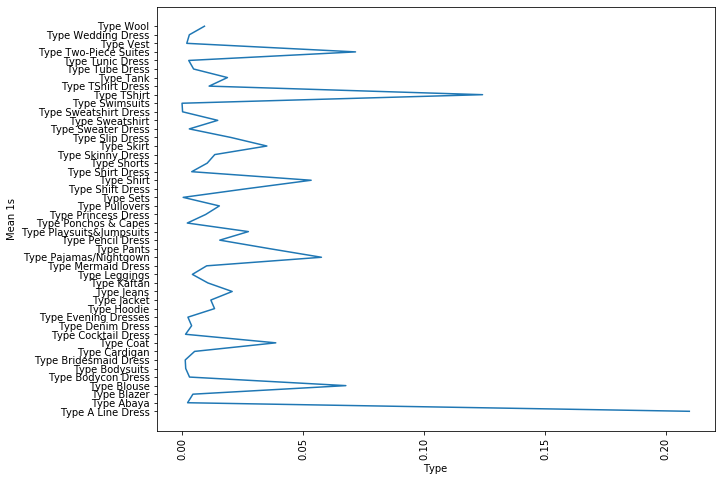

<Figure size 432x288 with 0 Axes>

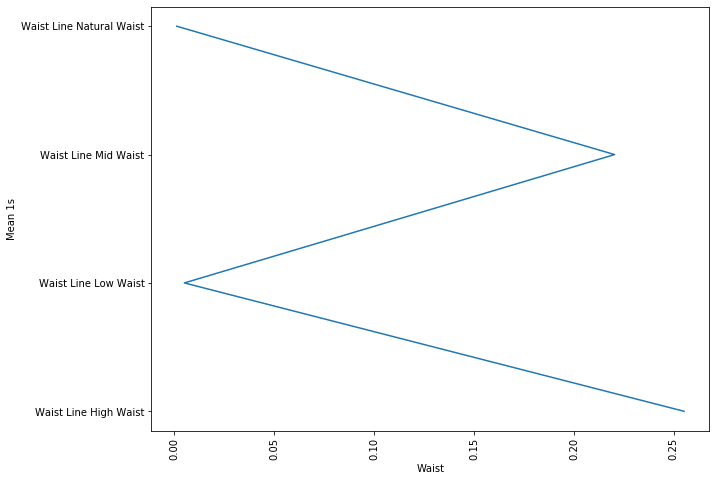

<Figure size 432x288 with 0 Axes>

In [111]:

n = len(features_analysis_df.group.unique())
for i, group in enumerate(features_analysis_df.group.unique()):
    plt.figure(figsize=(10,120))
    plt.subplot(n,1,i+1)
    plt.plot(features_analysis_df[features_analysis_df.group == group]['mean'].values, features_analysis_df[features_analysis_df.group == group].index)
    plt.ylabel("Mean 1s")
    plt.xlabel(group)
    plt.xticks(rotation=90)
    plt.show()
    

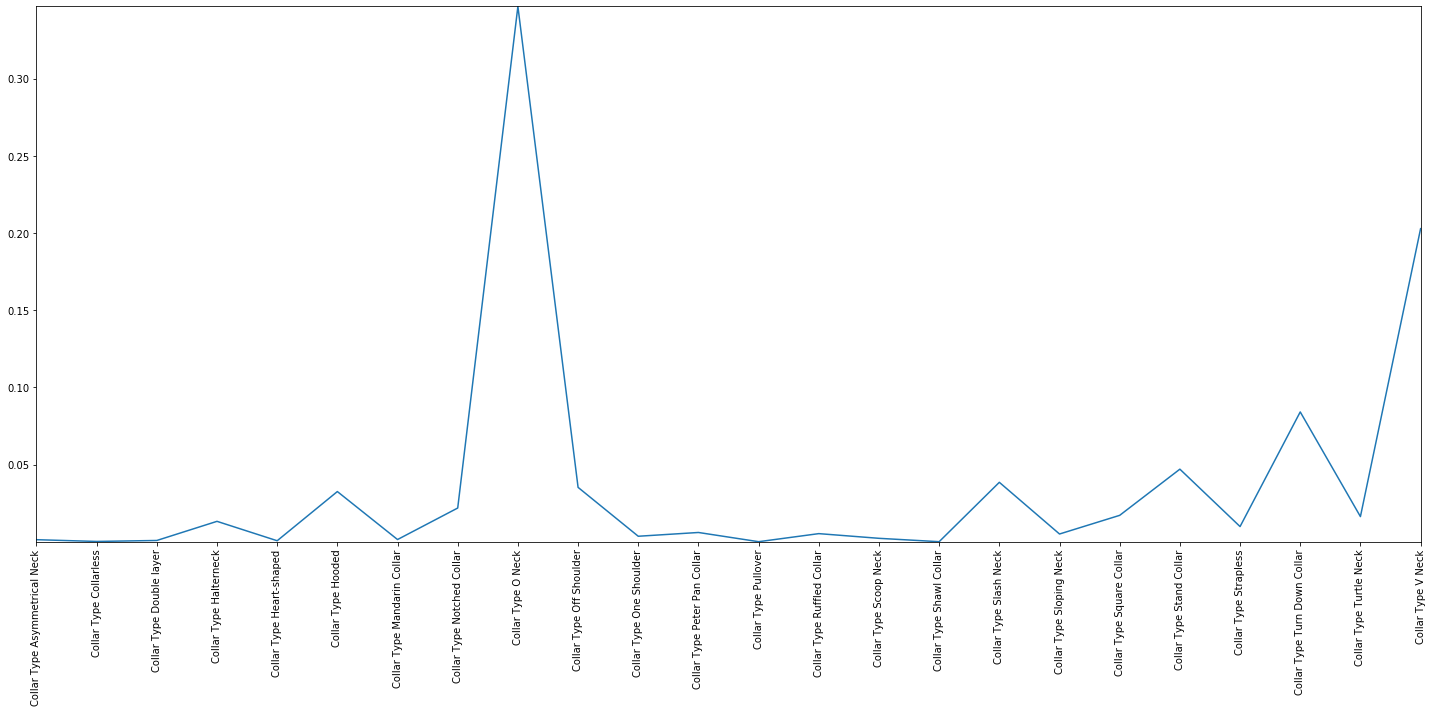

In [120]:
line_plot(features_analysis_df[features_analysis_df.group == "Collar"]['mean'])

In [165]:
feature_group = features_analysis_df.groupby('group')

In [183]:
feature_group.groups.keys()

dict_keys(['Belt', 'Closure', 'Collar', 'Decoration', 'Fitness', 'Length', 'Pant', 'Pattern', 'Placket', 'Sleeve', 'Style/Occasion', 'Type', 'Waist'])

In [186]:
feature_group.get_group('Collar').sort_values('sum', ascending=False)

,sum,len,mean,group,feature
Collar Type O Neck,33358.0,96197.0,0.346768,Collar,Collar Type O Neck
Collar Type V Neck,19508.0,96197.0,0.202792,Collar,Collar Type V Neck
Collar Type Turn Down Collar,8088.0,96197.0,0.084077,Collar,Collar Type Turn Down Collar
Collar Type Stand Collar,4521.0,96197.0,0.046997,Collar,Collar Type Stand Collar
Collar Type Slash Neck,3702.0,96197.0,0.038484,Collar,Collar Type Slash Neck
Collar Type Off Shoulder,3387.0,96197.0,0.035209,Collar,Collar Type Off Shoulder
Collar Type Hooded,3126.0,96197.0,0.032496,Collar,Collar Type Hooded
Collar Type Notched Collar,2100.0,96197.0,0.021830,Collar,Collar Type Notched Collar
Collar Type Square Collar,1644.0,96197.0,0.017090,Collar,Collar Type Square Collar
Collar Type Turtle Neck,1566.0,96197.0,0.016279,Collar,Collar Type Turtle Neck


In [119]:
def line_plot(series):
    plt.figure(figsize=(20,10))
    plt.plot(series)
    plt.xticks(rotation=90)
    plt.autoscale(tight=True)
    plt.tight_layout()
    plt.show() 